In [10]:
import MetaTrader5 as mt
import pandas as pd
from tqdm.notebook import tqdm
import talib as ta
from MetaTraderBacktest import Strategy, Timeframes
from datetime import datetime

In [11]:
import talib as ta

symbol = '#AAPL'

class SmaCrossover(Strategy):
    def on_bar(self, data, current_bars):
        if self.is_trading_time('#AAPL'):
            long_sma = ta.SMA(data['close'].dropna(), 10)
            short_sma = ta.SMA(data['close'].dropna(), 3)
            if short_sma.iloc[-1] > long_sma.iloc[-1]:
                if self.is_position_open('#AAPL', 'SELL'):
                    self.close_position(self.positions.iloc[0].name)
                self.open_position('BUY', symbol, 1)
            if short_sma.iloc[-1] < long_sma.iloc[-1]:
                if self.is_position_open('#AAPL', 'BUY'):
                    self.close_position(self.positions.iloc[0].name)
                self.open_position('SELL', symbol, 1)

100%|██████████| 26682/26682 [03:38<00:00, 122.25it/s]


,symbol,type,volume,pnl,opened_at,closed_at
0,#AAPL,BUY,1,0.24,2020-01-09 16:00:00,2020-01-10 22:00:00
1,#AAPL,BUY,1,0.98,2020-01-09 17:00:00,2020-01-13 16:00:00
2,#AAPL,BUY,1,0.38,2020-01-09 18:00:00,2020-01-13 17:00:00
3,#AAPL,BUY,1,1.54,2020-01-09 19:00:00,2020-01-13 18:00:00
4,#AAPL,BUY,1,0.88,2020-01-09 20:00:00,2020-01-13 19:00:00
...,...,...,...,...,...,...
5297,#AAPL,SELL,1,-9.83,2023-01-13 16:00:00,2023-01-24 18:00:00
5298,#AAPL,SELL,1,-8.65,2023-01-13 17:00:00,2023-01-24 19:00:00
5299,#AAPL,SELL,1,-9.99,2023-01-13 18:00:00,2023-01-24 20:00:00
5300,#AAPL,BUY,1,9.07,2023-01-13 19:00:00,2023-01-24 21:00:00


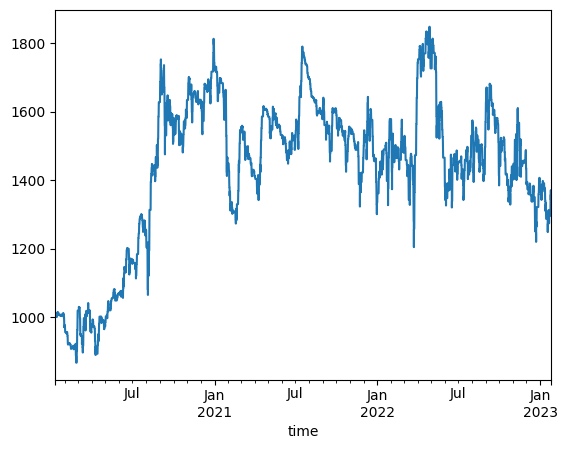

In [12]:
b = SmaCrossover(date_from = datetime(2020, 1, 1), date_to=datetime(2023, 1, 25), timeframe=Timeframes.H1, symbols_to_test=['#AAPL'])
b.run(200)
trades = b.performance()
trades